Tensor Library
1. Designed to handle large-scale numerical computations
2. Tensors can represent the following in NN
      * Input(images, audio, text)
      * Weights(parameters of the model)
      * Outputs(predicted values)
3. TensorFlow supports these operations on tensors
      * Addition
      * Multiplication
      * Differentitation ( computes exact derivatives/ gradients of functions within machine percision)

  
What is a Tensor
1. A tensor is a multi-dimensional array in python
- Generalies the concept of scalars ( single numbers), vectors (1D array), and matrices(2D arrays) to higher dimensions

2. Tensors are a way to represent data in structured formats of ANY rank
- 0D for scalars, 1D for vectors, 2D for matrices, and so on
- Representations of the 4th dimention


# Logistic Regression as a Single Neuron Model

## Imports

In [9]:
import numpy as np
import h5py
import requests
import os
import matplotlib.pyplot as plt


# LLM -> Large Language Model
# * Are deep neural network models

#Threshold
# * Is the boundary (often its 0.5) that separates the values on the sigmoid function  pushes them to one side(0 OR 1)

# Logistic Regression is considered 1 Neuron in the bigger neural Network

## Helper Functions (Just run this cell - no need to go through the code in helper functions)

In [10]:
def download_file(url, local_filename):
    """
    Downloads a file from a URL and saves it locally.
    """
    if not os.path.exists(local_filename):
        print(f"Downloading {local_filename}...")
        response = requests.get(url)
        if response.status_code == 200:
            with open(local_filename, 'wb') as f:
                f.write(response.content)
            print(f"File downloaded: {local_filename}")
        else:
            raise Exception(f"Failed to download file from {url}. Status code: {response.status_code}")
    else:
        print(f"File already exists: {local_filename}")

def load_dataset():
    # URLs of the .h5 files
    train_url = 'https://github.com/PyDataGBC/PyML2025/raw/refs/heads/main/LabWeek2/dataset/train_catvnoncat.h5'
    test_url = 'https://github.com/PyDataGBC/PyML2025/raw/refs/heads/main/LabWeek2/dataset/test_catvnoncat.h5'

    # Local file paths
    train_file = 'train_catvnoncat.h5'
    test_file = 'test_catvnoncat.h5'

    # Download the files if not already present
    download_file(train_url, train_file)
    download_file(test_url, test_file)

    # Open the files using h5py
    train_dataset = h5py.File(train_file, "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:])  # Train set features [:] -> all indexes
    train_set_y_orig = np.array(train_dataset["train_set_y"][:])  # Train set labels

    test_dataset = h5py.File(test_file, "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:])  # Test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:])  # Test set labels

    classes = np.array(test_dataset["list_classes"][:])  # List of classes

    # Reshape labels
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

## Importing Dataset

In [11]:


train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()


File downloaded: train_catvnoncat.h5
File downloaded: test_catvnoncat.h5


## Data Visualization

label:  [1]


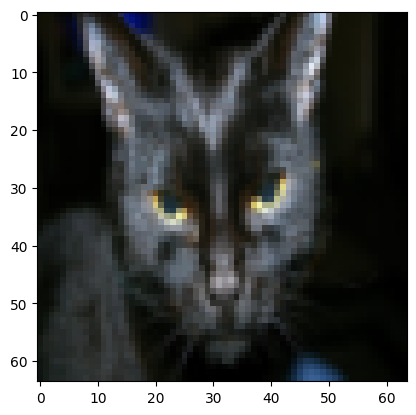

In [12]:
# Example of a picture
index = 25   # select a number between 0 and 208
#index = np.random.randint(0, 200)  # you can also generate a random number and see the different imagge each time
plt.imshow(train_set_x_orig[index])
# plt.imshow -> pythong 데이터 시각화 라이브러리 matplotlib에서 이미지 데이터를 화면에 출력할때 사용하는 함수.
print("label: ", train_set_y[:, index])

### **Exercise 1:** Take a look at five different images in train/test set. Try to see both cat and non-cat samples.

label:  [1]
label:  [0]
label:  [0]
label:  [0]
label:  [0]
label:  [0]
label:  [0]
label:  [0]
label:  [1]
label:  [0]
label:  [0]


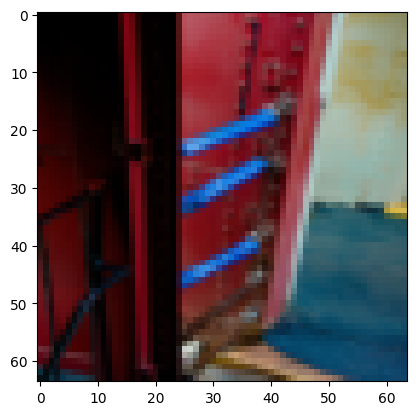

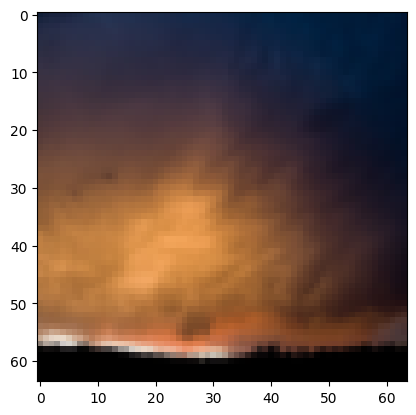

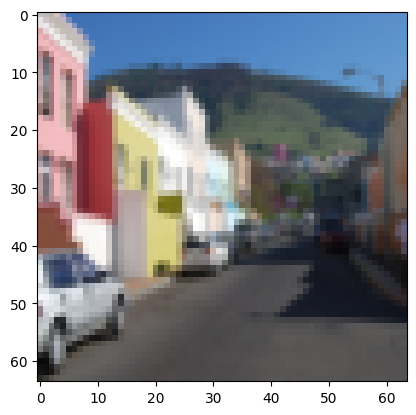

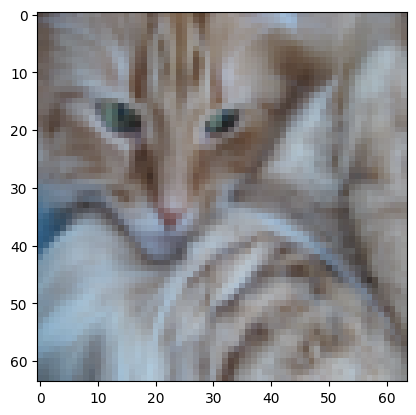

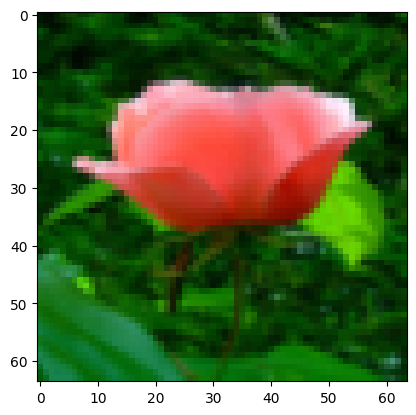

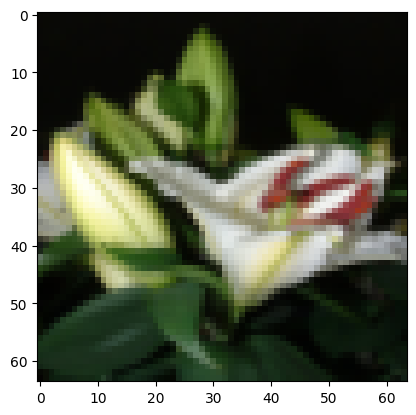

In [13]:
#your code here

# Index
# plt.imshow -> python 데이터 시각화 라이브러리

index = 27
plt.imshow(train_set_x_orig[index])
print("label: ", train_set_y[:, index])

index = 26
plt.imshow(train_set_x_orig[index])
print("label: ", train_set_y[:, index])


index1 = 30
plt.imshow(train_set_x_orig[index1])
print("label: ", train_set_y[:, index1])

index2 = 35
plt.imshow(train_set_x_orig[index2])
print("label: ", train_set_y[:, index2])

index3 = 40
plt.imshow(train_set_x_orig[index3])
print("label: ", train_set_y[:, index3])

index4 = 45
plt.imshow(train_set_x_orig[index4])
print("label: ", train_set_y[:, index4])



# using for loop to print for 5
for index in range(5):
  plt.figure() # initialize a empty figure
  plt.imshow(train_set_x_orig[index])
  print("label: ", train_set_y[:, index])


### **Exercise 2:** Print `train_set_y` array to see the labels of the data. What percentage of the pictures in `train set` contain cats?

In [14]:
# your code here
print(train_set_y[:]) # prints the entire contents of the train_set_y array
# [:] -> is a slicing operation that selects all elements in the array
print(train_set_y.shape[1])

# prints the size of the second dimension (axis 1) of the train_set_y array
# train_set_y.shape = (m, n) , then shape[1] equals n


# Sums all the values in the train_set_y array
# assuming that train_set_y contains binary labels
cat_percentage = (np.sum(train_set_y[:]) / train_set_y.size) * 100
print(f"Cat percentage: {cat_percentage}%")

[[0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0
  0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1
  0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1 0 1 1
  1 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 0
  1 1 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 1 1 0 1 0 1
  0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0]]
209
Cat percentage: 34.44976076555024%


## Data Pre-processing

### Brief Theory: Numerical Representation of Images

![preprocessing](https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek2/assets/imvectorkiank.png)

### **Example 1:** Numerical Representation of an Image

![](https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek2/assets/imtovec_example.webp)

#### Step 1: Numerical representation of each channel (`MATRIX` format)

In [15]:
red_channel = np.array([[255, 123, 135], [44, 12, 15], [56, 87, 90]]) # 2d array: Matrix
green_channel = np.array([[255, 133, 175], [24, 123, 169], [98, 66, 77]]) # 2d array: Matrix
blue_channel = np.array([[66, 54, 88], [55, 98, 54], [87, 142, 89]])

print("Red Channel")
print(red_channel.shape)
print(red_channel)

print("Green Channel")
print(green_channel.shape)
print(green_channel)

print("Bue Channel")
print(blue_channel.shape)
print(blue_channel)



Red Channel
(3, 3)
[[255 123 135]
 [ 44  12  15]
 [ 56  87  90]]
Green Channel
(3, 3)
[[255 133 175]
 [ 24 123 169]
 [ 98  66  77]]
Bue Channel
(3, 3)
[[ 66  54  88]
 [ 55  98  54]
 [ 87 142  89]]


#### Step 2: Putting the channels together in the form of a `TENSOR`

In [16]:
print("channel, height, width")
airplane_image = np.array([red_channel, green_channel, blue_channel])  # 3d array: Tensor
print(airplane_image.shape)
print(airplane_image)

channel, height, width
(3, 3, 3)
[[[255 123 135]
  [ 44  12  15]
  [ 56  87  90]]

 [[255 133 175]
  [ 24 123 169]
  [ 98  66  77]]

 [[ 66  54  88]
  [ 55  98  54]
  [ 87 142  89]]]


#### Step 3: Flatten the `tensor` into a `VECTOR`

In [17]:
# flatten() : NumPy 배열에서 사용되는 메서드, 다차원 배열을 1차원 배열(Vector)로 변환함
# 배열의 데이터는 원래 순서대로 이어붙여진 형태로 저장

airplane_flatten = airplane_image.flatten()   # 1d array: Vector
print(airplane_flatten.shape)
print(airplane_flatten)

(27,)
[255 123 135  44  12  15  56  87  90 255 133 175  24 123 169  98  66  77
  66  54  88  55  98  54  87 142  89]


### **Exercise 3:** Take one sample form train set again and check the shape of it. Try to interpret the numbers in the `shape`.

**Notes:**
- The images are 64x64 `pixels`.
- There are 3 RGB `channels`.

In [18]:
sample_index = 25 # Random cat
sample_image = train_set_x_orig[sample_index]

#your code here
print(sample_image.shape)
print(sample_image.ndim) # number of dimensions
print(sample_image)

# Flatten and recheck the num dimensions
sample_flatten = sample_image.flatten()
print(sample_flatten.shape)
print(sample_flatten.ndim)
print(sample_flatten)

(64, 64, 3)
3
[[[15 15  5]
  [17 17  6]
  [17 17  7]
  ...
  [ 1  1  0]
  [ 1  1  1]
  [ 1  1  1]]

 [[16 16  5]
  [18 17  6]
  [19 18  9]
  ...
  [ 1  1  0]
  [ 1  1  1]
  [ 1  1  1]]

 [[16 16  6]
  [18 17  8]
  [21 19  9]
  ...
  [ 1  1  1]
  [ 1  1  0]
  [ 2  2  1]]

 ...

 [[16 21 18]
  [22 27 24]
  [29 35 33]
  ...
  [ 0  1  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[16 20 16]
  [22 29 25]
  [29 35 32]
  ...
  [ 1  3  1]
  [ 0  1  0]
  [ 0  0  0]]

 [[14 19 14]
  [21 29 25]
  [31 37 33]
  ...
  [ 2  4  2]
  [ 1  2  1]
  [ 0  0  0]]]
(12288,)
1
[15 15  5 ...  0  0  0]


### **Exercise 4:** Fallaten the this sample image? what is the size of the flattened image? why this number?

In [19]:
# Flatten the sample image
sample_flatten = sample_image.flatten()

# Print the size of the flattened image
print(sample_flatten.shape)

(12288,)


### **Data Preprocessing:** Flattening the entrie Train and Test Datasets

**Note:** We're going to talk about the details of the following code in next sessions. For now just pay attentin to the output shapes of data.

In [20]:
X_train = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1)
print("Train set shape: ", X_train.shape)

X_test = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1)
print("Test set shape: ", X_test.shape)

y_train = train_set_y[0]
print("Train label shape: ", y_train.shape)

y_test = test_set_y[0]
print("Test label shape: ", y_test.shape)



Train set shape:  (209, 12288)
Test set shape:  (50, 12288)
Train label shape:  (209,)
Test label shape:  (50,)


**Important Notes:**
- We have 209 samples in the train set, and
- 50 samples in the test set.
- each sample has 64x64x3=12288 `features`. So each pixel can be considered as one feature.
- remember that we had `4` features in `IRIS` dataset and now we have more than `10,000` features.

## Implementing Logistic Regression

This is what happens under the hood when you use the `LogisticRegression` classifier in scikit-learn.

![](https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek2/assets/LogReg_kiank.png)

### **Example 2:** What is the label in the following hypothetical input?

![](https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek2/assets/toyexample.png)

In [21]:
#your calculation here

### **Exercise 6:** Train a `LogisticRegression` classifier to run a binary classification on the flattened cat pictures.

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [23]:
#your code here
# build model
model = LogisticRegression()

model.fit(X_train, y_train)  # this trains the logistic regression model on the training data
                             # X_train : the features of the training data, each row represents one sample, and each column represents one feature
                             # y_train: the labels for the training data. Each entry corresponds to the true label of the respective sample in X_train

y_pred = model.predict(X_test)

### **Exercise 7:** Evaluate your model manually

1. Choose a random index of an image.
2. Display the image.
3. Print the original label.
4. Print the predicted label.
5. Repeat this process multiple times to identify which pictures are more challenging for the model.

### **Exercise 8:** Report the overall accuracy of your classifier

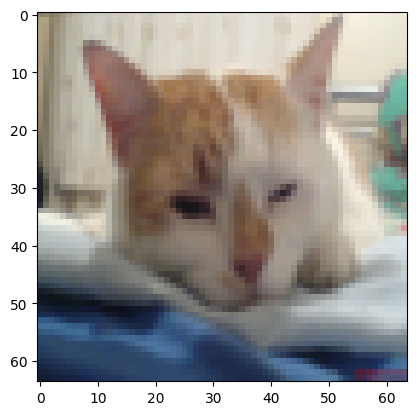

Original Label: 1
Predicted Label: 1


In [24]:
#you code here
import random
import matplotlib.pyplot as plt

# Choose a random index
# random.randint(a, b) 는 a 이상 b 이하의 정수를 랜덤하게 선택합니다
index = random.randint(0, X_test.shape[0])


# Display the image
plt.imshow(test_set_x_orig[index])
plt.show()

# Print the original label
print("Original Label:", y_test[index])

# Print the predicted label
predicted_label = model.predict(X_test[index].reshape(1, -1))[0]  # Reshape for single prediction
print("Predicted Label:", predicted_label)

## MNIST dataset (Exercise 9-12) - Optional, if you have extra time

In [25]:
#import mnist dataset
from keras.datasets import mnist


(x_train, y_train), (x_test, y_test) = mnist.load_data()



# x_train -> This variable will store the actual images of handwritten digits used for training the model

# y_train -> This variable will store the corresponding labels for the traning images

# Testing data (x_test, y_test)  -> same as train but its testing the performace of the trained model
# mnist.load_data() -> This function is part of the keras.datasets module
# its specifically designed to download and load the MNIST dataset.


In [26]:
x_train.shape

(60000, 28, 28)

Label:  3
Image Shape:  (28, 28)


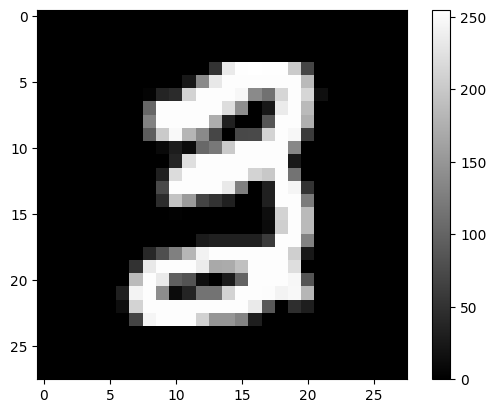

In [27]:
#Note: Run this cell multiple times
index = np.random.randint(0, x_train.shape[0])
print("Label: ", y_train[index])
print("Image Shape: ", x_train[index].shape)
plt.imshow(x_train[index], cmap='gray')
plt.colorbar()

### **Excercise 9:** What is the difference between a black-and-white image and a color image in terms of numerical representation?

### Hint: check the number of channels in the two types of images.

your answer here:

### **Exercise 10:** Select one data sample and flatten it. What is the size of the flattened image and why?

In [28]:
## your code here

### **Excercise 11:** Flatten the images in Train and Test Datasets so that each image is a 1D array

In [29]:
##your code here

### **Excercise 12:** Implement Logistic Regression on MNIST dataset using scikit-learn. What is the accuracy of your model?

In [30]:
#your code here